In [26]:
from PIL import Image
import datetime
import time
from datetime import timedelta
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from krwordrank.word import KRWordRank
from krwordrank.word import summarize_with_keywords
from krwordrank.sentence import summarize_with_sentences

# 2030 데이터로 키워드 추출

In [27]:
df = pd.read_csv('data/data_candidates.csv', index_col=0)
df

,Date,ID,Comment_date,Comment,Candidate,Source
Title,,,,,,
김부겸 “마지막 공직이라 생각”… 대선 출마설 부인,2021-05-07 10:55:00,정병렬,2021-05-07 14:46:43,<대선 출마설> 어떤 외눈박이의 헛소리 이겠지.,김부겸,조선일보
김부겸 “마지막 공직이라 생각”… 대선 출마설 부인,2021-05-07 10:55:00,이규태,2021-05-07 11:11:00,악취가 진동하는 엉망진창인 자신의 모습은 안보이나? 후보사퇴 하고 있는듯 없는듯이 ...,김부겸,조선일보
"김부겸 “검수완박은 일부 의원 의견... 문자폭탄, 민주적 방식 아냐“",2021-05-07 00:51:00,윤정삼,2021-05-07 07:55:49,김부겸 32번의 차량 압류 . . . 이렇게 법을 위반한 사람이 대한민국 총리가 된...,김부겸,조선일보
"김부겸 “검수완박은 일부 의원 의견... 문자폭탄, 민주적 방식 아냐“",2021-05-07 00:51:00,황성식,2021-05-07 05:10:51,부겸이 니는 부결이 정답이다,김부겸,조선일보
"김부겸 “검수완박은 일부 의원 의견... 문자폭탄, 민주적 방식 아냐“",2021-05-07 00:51:00,윤성철,2021-05-07 04:54:47,김부겸의 평소 고상한 품위 있는 언행 하던 사람이 상식이 파괴된 비도덕적이고 비윤리...,김부겸,조선일보
...,...,...,...,...,...,...
"[여랑야랑]윤석열 ★의 순간? 벌의 순간? / 황교안, 의문의 1패? | 뉴스A",2021-03-05,임인기,2021-03-16,황교안이 나라를이많큼말아먹구 파탄냈으면 평생니가할일은다한거다 제발 더이상나라망치지말...,황교안,YouTube
"[여랑야랑]윤석열 ★의 순간? 벌의 순간? / 황교안, 의문의 1패? | 뉴스A",2021-03-05,안태준,2021-03-16,윤석열 .힘내시고.화이팅입니다.,황교안,YouTube
"[여랑야랑]윤석열 ★의 순간? 벌의 순간? / 황교안, 의문의 1패? | 뉴스A",2021-03-05,이희만,2021-03-16,황교안 대표 가 보수다,황교안,YouTube


In [28]:
df['Candidate'].value_counts()

윤석열    51816
이재명    27797
안철수    19121
홍준표    17394
이낙연    13341
추미애     9262
정세균     7510
유승민     5611
황교안     3415
김부겸     2361
심상정      906
Name: Candidate, dtype: int64

## 후보별로 나누기
- 윤석열    51816
- 이재명    27797
- 안철수    19121
- 홍준표    17394
- 이낙연    13341
- 추미애     9262
- 정세균     7510
- 유승민     5611
- 황교안     3415
- 김부겸     2361
- 심상정      906

In [29]:
# 윤석열만 추출(web을 임식적으로 윤석열만 하기로 했으므로 윤석열만 추출)
sy = df.query('Candidate == "윤석열"')
sy

,Date,ID,Comment_date,Comment,Candidate,Source
Title,,,,,,
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]",2021-05-12 17:09:00,jm11****,2021-05-12 23:04:38,윤석열은 정치경험이 전무해서 본격적으로 대선에 뛰어드는 시기부터 탈탈 털릴것이다~ ...,윤석열,중앙일보
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]",2021-05-12 17:09:00,esyz****,2021-05-12 22:19:21,저늠한테 나라 맡겼다간 베네수웰라되는건시간문제다 나라까지팔아먹을늠이다,윤석열,중앙일보
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]",2021-05-12 17:09:00,sons****,2021-05-12 21:38:43,이 게임은 3차 대전이 안일어나는 한 윤총장 완승이다 사실상 게임 끝났다 아직 자기...,윤석열,중앙일보
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]",2021-05-12 17:09:00,ssbk****,2021-05-12 19:48:44,"재명이는 민주당 간판으로 출사표를 던지기도 어렵겠지만, 오뉴월 여자의 한 서리 않맞...",윤석열,중앙일보
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]",2021-05-12 17:09:00,한경수(****,2021-05-12 18:25:58,도대체 아직 정책도 이념도 밝힌적 없는 윤석렬에 열광하는 머리빈 인간들은 뭐냐? 막...,윤석열,중앙일보
...,...,...,...,...,...,...
(단독특종) 1부 윤석열 대선출마 결심 굳혔다 / 정택진 김신애 수수뉴스,2021-03-02,김띵똥,2021-03-16,"윤석열 좌파, 박대통령 감옥넣어 나라가 이 지경, 오리지널 좌파, 보수는 절대 속지...",윤석열,YouTube
(단독특종) 1부 윤석열 대선출마 결심 굳혔다 / 정택진 김신애 수수뉴스,2021-03-02,보라매,2021-03-16,"이런 거품지지는 하지않았으면, 하네요 태생이 법치주의 네 건드리면쏜다 대통령깜은 아닌듯",윤석열,YouTube
(단독특종) 1부 윤석열 대선출마 결심 굳혔다 / 정택진 김신애 수수뉴스,2021-03-02,유순남,2021-03-16,윤석열얼빠진이중인간이다방송똑바로하라,윤석열,YouTube


## 워드클라우드 생성

In [30]:
df = sy[['Comment']]
df

,Comment
Title,
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]",윤석열은 정치경험이 전무해서 본격적으로 대선에 뛰어드는 시기부터 탈탈 털릴것이다~ ...
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]",저늠한테 나라 맡겼다간 베네수웰라되는건시간문제다 나라까지팔아먹을늠이다
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]",이 게임은 3차 대전이 안일어나는 한 윤총장 완승이다 사실상 게임 끝났다 아직 자기...
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]","재명이는 민주당 간판으로 출사표를 던지기도 어렵겠지만, 오뉴월 여자의 한 서리 않맞..."
"대선 가상 양자대결, 윤석열 40.2%·이재명 37.4%[한길리서치]",도대체 아직 정책도 이념도 밝힌적 없는 윤석렬에 열광하는 머리빈 인간들은 뭐냐? 막...
...,...
(단독특종) 1부 윤석열 대선출마 결심 굳혔다 / 정택진 김신애 수수뉴스,"윤석열 좌파, 박대통령 감옥넣어 나라가 이 지경, 오리지널 좌파, 보수는 절대 속지..."
(단독특종) 1부 윤석열 대선출마 결심 굳혔다 / 정택진 김신애 수수뉴스,"이런 거품지지는 하지않았으면, 하네요 태생이 법치주의 네 건드리면쏜다 대통령깜은 아닌듯"
(단독특종) 1부 윤석열 대선출마 결심 굳혔다 / 정택진 김신애 수수뉴스,윤석열얼빠진이중인간이다방송똑바로하라


In [31]:
# df에 null값이 있는 지 확인
df.isna().sum()

Comment    0
dtype: int64

In [32]:
# df의 null값 제거
df.dropna(axis=0,inplace=True)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# 결측치 잘 제거되었는지 확인
df.isna().sum()

Comment    0
dtype: int64

In [34]:
texts = df['Comment'].tolist()
texts

['윤석열은 정치경험이 전무해서 본격적으로 대선에 뛰어드는 시기부터 탈탈 털릴것이다~ 그때야 조국의 심정을 알게될 것이고.... 이재명은 패륜 및 스캔들을 어찌 극복하냐가 관건인데... 예태까지 잘 빠져나갔으니 잘 극복할 것으로 보인다',
 '저늠한테 나라 맡겼다간 베네수웰라되는건시간문제다 나라까지팔아먹을늠이다',
 '이 게임은 3차 대전이 안일어나는 한 윤총장 완승이다 사실상 게임 끝났다 아직 자기의견도 안낸사람이 저정도면 더이상 뭘 말해야하나 그만큼 뭉가에 대해 환멸을 느낀 백성이 만타는거다 재명이 저 양아치 나오면 땡큐지 절데 윤 못이긴다',
 '재명이는 민주당 간판으로 출사표를 던지기도 어렵겠지만, 오뉴월 여자의 한 서리 않맞으려면 그 이전에 "부선"이 부터 부릎꿇고 살살빌어 달래줘야 한다.',
 '도대체 아직 정책도 이념도 밝힌적 없는 윤석렬에 열광하는 머리빈 인간들은 뭐냐? 막상 링에 오르면 무참하게 깨질지도 모르는데,단순히 문통 말을 안 들었다는 한가지 사실만으로 대한민국 대통령감? 문통에 반대하면 전부 대통령감이냐? 어리석은 중생들...',
 '똥인지 된장인지 찍어거 먹어 봐야 맛을아는 얼라?',
 '당연히 윤석렬을 찍지 어떤 골빈 미친 잉간들이 패륜아를 찍겠는가? 누가 나라 말아먹을 잉간을 찍겠는가? 누가 조잔한 잉간을 찍겠는가? 오날날 이렇게 당하고도 성추행당 무리에게 표를 준단 말이가? 씰데없이 헛조사하고 날이야.',
 '양자 대결같은 소릴하고 자빠졌네! 병X같은 놈들 실전에 뛰기도 전에 꺼꾸러지는걸 꼭 봐야 느끼는 족속들 요즈음 요런 기사에 푹빠져 시간가는줄도 모르겠지 여하튼 쓰레기들 살판났네',
 '실제 투표하면 격차는 20%이상 날거다',
 '김부선 하고 이재명 대결하면 누가 승리할까 부선씨 이재명 양아치 물건은 부패 하고 냄새나고 힘도없고',
 '세상 판세가 니맘데로 될것같냐 철대가리도 싸가지도 없는것',
 '욜씸히 경험하세용~~나라의미래를위하여~~~~~',
 '김웅 바르고 참신하다고 생각한다 허나 말은 바른말이나 좀더 깊이있는 공부

In [35]:
# 불용어 제거
with open('data/stopwords.txt') as fp :
    stopwords = fp.readlines()

stopwords = set([x.strip() for x in stopwords])

In [36]:
keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts) # with default arguments

scan vocabs ... 
num vocabs = 79856
done = 10 Early stopped.


In [37]:
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}
passwords

{'국민': 133.5485325682606,
 '정치': 85.51094650009819,
 '나라': 64.65386502605568,
 '사람': 62.42265866029893,
 '이재명': 60.45517476970087,
 '검찰': 58.69751141153974,
 '대선': 54.399334389367525,
 '지지': 52.13860712319752,
 '정권': 43.28209112230519,
 '생각': 34.572225867350014,
 '최재형': 32.24067536739272,
 '선거': 29.945939861595203,
 '수사': 29.042916169815005,
 '박근혜': 28.670537815172185,
 '언론': 27.48432389188848,
 '화이팅': 25.843082340996798,
 '많이': 25.596761833031866,
 '부동산': 25.40492536833272,
 '뚫어': 25.313460476882312,
 '먹아지를': 24.002323012657808,
 '대권': 23.647588828460005,
 '인간': 23.574824563028812,
 '홍준표': 23.139097001045727,
 '감사': 23.010414153525982,
 '정신': 22.708101807098565,
 '후보': 22.28767414267531,
 '보수': 22.029607913112176,
 '서울': 21.416214791279877,
 '김종인': 21.358885536929378,
 '윤총장': 21.292998803657223,
 '정의': 20.837247090975424,
 '장모': 20.609480666523506,
 '검사': 20.286257789990998,
 '것은': 19.85114503197909,
 '허경영': 19.824984306992043,
 '교회': 19.80680810855255,
 '조국': 19.724196873941565,
 '..

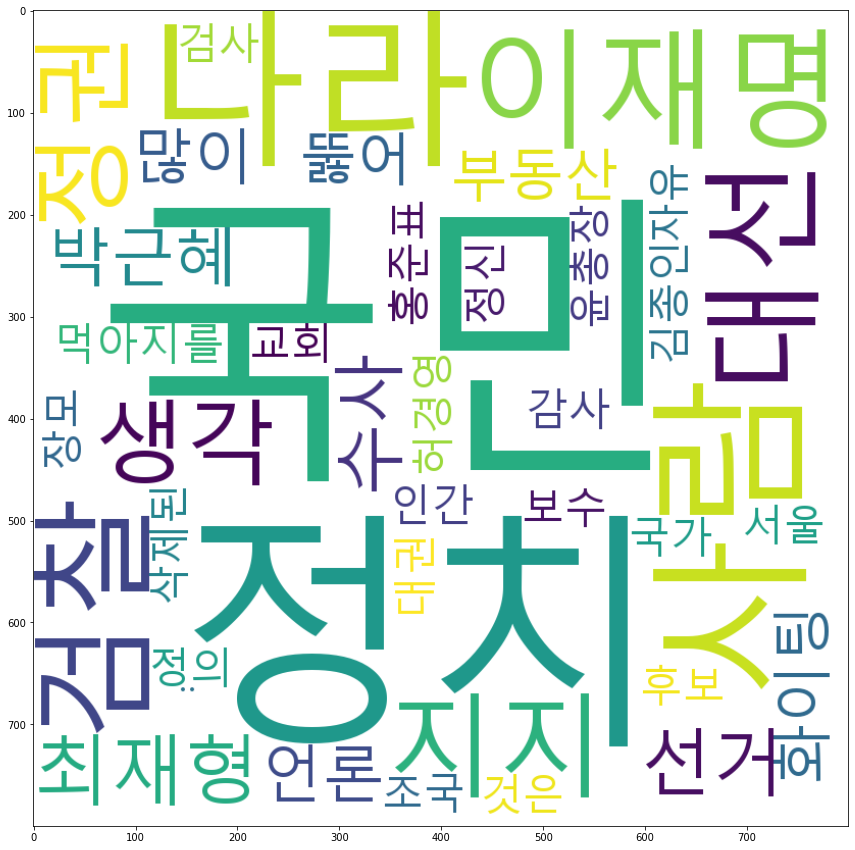

In [44]:
import random

# 워드클라우드 색상 변경 함수 (리턴 위 : 보라색, 리턴 아래 : 회색 계열)
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(212,313),np.random.randint(26,32),np.random.randint(45,80)))
    #return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)
    
# 폰트 패스 설정
font_path = "c:/Windows/Fonts/malgun.ttf"

# 바탕화면 지도 모양으로 만들기 위해 지도 이미지 들고오기
# image_map = np.array(Image.open('data/map.png'))

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    #mask=image_map,
    background_color="white",
    # color_func = color_func,
    #colormap = 'PRGn'
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

fig = plt.figure(figsize=(15, 15))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

# wordcloud 불용어 있으면 불용어 사전에 추가하기

In [14]:
# f = open("data/stopwords.txt",'a')
# for t in stopwords:
#     f.write(t+'\n')
# f.close()

In [15]:
# f = open("data/stopwords.txt",'a')
# f.write('ㅎㅎ\n')
# f.write('못하\n')
# f.write('됩니다.\n')
# f.write('합니다.\n')
# f.write('것이\n')
# f.write('입니다.\n')
# f.write('있습니다.\n')
# f.write('이렇게.\n')
# f.write('한다.\n')
# f.write('겁니다.\n')
# f.write('민주당\n')
# f.write('오세훈\n')
# f.write('문재인\n')
# f.write('것을\n')
# f.write('이렇게\n')
# f.write('너무\n')
# f.write('가지고\n')
# f.write('ㅋㅋ\n')
# f.write('크크크\n')
# f.write('대한\n')
# # f.write('지금\n')
# f.write('윤석열\n')
# f.close()

# 핵심 문장 추출

In [16]:
# 불용어 처리 O 버전
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1 # 너무 길거나 짧은 문장 제거

stopwords = stopwords
num_keywords = 100
num_keysents = 10

# 다양한 조건 추가 (불용어 처리 등등)
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.9,
    num_keywords=num_keywords,
    num_keysents=num_keysents,
    verbose=False
)
print(sents,keywords)
print(len(keywords))

['운석열 전 검찰 총장 지지 합니다. 정치 하십시요. 국민의 뜻이라면 하셔서 나라를 맡아 주십시오. 정의.', '보수자유 우파의 대선후보 용광로에 ♥김관진  고영주  최재형 김문수 등 탄핵문제에서 자유로운 사람을 포함하자', '윤석열 화이팅 이게 진짜 여론 조사지 무슨 이재명이냐 황당하게 조작질할 생각마라...', '민주당  언론개혁 못하면  정권 빼앗긴다   선거끝나고   언론개혁를  빠르게  통과 시켜라 정신차려라', '어이쿠 출마 감사.이젠 마누라 장모 조국만큼 털자.털 놈은???? 임검사 임명.', '윤총장님이수사할것들이무지많을텐데조금더수사하시다가대권에나오셨음했는데수사는누가하나요', '정책도 없는 윤석열 안되요.정책이 뚜렸한 국가혁명당 허경영총재님 33정책 대한민국 경제를 살릴것입니다.서울시장 허경영 20대 대통령 허경영', '김종인은홍준표를복당시키지않아그의인간성이만천하에다드러났다', '작금의 시대,,,,,, 권력이란? = 아편 = 성범죄 = 부동산투기 = 모든, 부정부패의 단초가 되어가고있다!!!', '님들아 🗣~~옆구리에.쪽빡차고.이문저문두드리고배회하지말고.💘 LA.👀 시사논평 귀한방송 많이 보고 깨달음을알면 산다.💘 🙌.👀 🙆.👀.💘 👍.💘'] {'국민': 133.5485325682606, '정치': 85.51094650009819, '나라': 64.65386502605568, '사람': 62.42265866029893, '이재명': 60.45517476970087, '검찰': 58.69751141153974, '대선': 54.399334389367525, '지지': 52.13860712319752, '정권': 43.28209112230519, '생각': 34.572225867350014, '최재형': 32.24067536739272, '선거': 29.945939861595203, '수사': 29.042916169815005, '박근혜': 28.670537815172185, '언론': 27.48432389188848, '화이팅': 25.84308

In [17]:
print(f'핵심 키워드 개수: {len(keywords)}')
print(f'핵심 키워드 : {keywords}')

핵심 키워드 개수: 100
핵심 키워드 : {'국민': 133.5485325682606, '정치': 85.51094650009819, '나라': 64.65386502605568, '사람': 62.42265866029893, '이재명': 60.45517476970087, '검찰': 58.69751141153974, '대선': 54.399334389367525, '지지': 52.13860712319752, '정권': 43.28209112230519, '생각': 34.572225867350014, '최재형': 32.24067536739272, '선거': 29.945939861595203, '수사': 29.042916169815005, '박근혜': 28.670537815172185, '언론': 27.48432389188848, '화이팅': 25.843082340996798, '많이': 25.596761833031866, '부동산': 25.40492536833272, '뚫어': 25.313460476882312, '먹아지를': 24.002323012657808, '대권': 23.647588828460005, '인간': 23.574824563028812, '홍준표': 23.139097001045727, '감사': 23.010414153525982, '정신': 22.708101807098565, '후보': 22.28767414267531, '보수': 22.029607913112176, '서울': 21.416214791279877, '김종인': 21.358885536929378, '윤총장': 21.292998803657223, '정의': 20.837247090975424, '장모': 20.609480666523506, '검사': 20.286257789990998, '것은': 19.85114503197909, '허경영': 19.824984306992043, '교회': 19.80680810855255, '조국': 19.724196873941565, '..': 19.6686105

In [18]:
# 핵심 키워드 리스트로 저장
keywords_list = []
for k,v in keywords.items():
    keywords_list.append(k)
keywords_list = keywords_list
keywords_list

['국민',
 '정치',
 '나라',
 '사람',
 '이재명',
 '검찰',
 '대선',
 '지지',
 '정권',
 '생각',
 '최재형',
 '선거',
 '수사',
 '박근혜',
 '언론',
 '화이팅',
 '많이',
 '부동산',
 '뚫어',
 '먹아지를',
 '대권',
 '인간',
 '홍준표',
 '감사',
 '정신',
 '후보',
 '보수',
 '서울',
 '김종인',
 '윤총장',
 '정의',
 '장모',
 '검사',
 '것은',
 '허경영',
 '교회',
 '조국',
 '..',
 '국가',
 '삭제된',
 '자유',
 '좋은',
 '총장',
 '방송',
 '문제',
 '응원',
 '그의',
 '위한',
 '말고',
 '여론',
 '부정',
 '말이',
 '서민',
 '나오',
 '알고',
 '정부',
 '추미애',
 '-->',
 '빨리',
 '차기',
 '댓글',
 '이낙연',
 '20',
 '권력',
 '출마',
 '유승민',
 '조사',
 '사기',
 '쓰레기',
 '그만',
 '좌파',
 '비리',
 '공정',
 '범죄',
 '야당',
 '인물',
 '세상',
 '국회',
 '최고',
 '담임',
 '그러',
 '끝까지',
 '국힘',
 '못한',
 '나는',
 '조작',
 '코로나',
 '있습니',
 '한국',
 '포교',
 '가족',
 '말을',
 '투표',
 '10',
 '니네',
 '개혁',
 '경제',
 '야권',
 '적폐',
 '잘못']

In [19]:
print(f'핵심 문장 개수: {len(sents)}')
print(f'핵심 문장 : {sents}')

핵심 문장 개수: 10
핵심 문장 : ['운석열 전 검찰 총장 지지 합니다. 정치 하십시요. 국민의 뜻이라면 하셔서 나라를 맡아 주십시오. 정의.', '보수자유 우파의 대선후보 용광로에 ♥김관진  고영주  최재형 김문수 등 탄핵문제에서 자유로운 사람을 포함하자', '윤석열 화이팅 이게 진짜 여론 조사지 무슨 이재명이냐 황당하게 조작질할 생각마라...', '민주당  언론개혁 못하면  정권 빼앗긴다   선거끝나고   언론개혁를  빠르게  통과 시켜라 정신차려라', '어이쿠 출마 감사.이젠 마누라 장모 조국만큼 털자.털 놈은???? 임검사 임명.', '윤총장님이수사할것들이무지많을텐데조금더수사하시다가대권에나오셨음했는데수사는누가하나요', '정책도 없는 윤석열 안되요.정책이 뚜렸한 국가혁명당 허경영총재님 33정책 대한민국 경제를 살릴것입니다.서울시장 허경영 20대 대통령 허경영', '김종인은홍준표를복당시키지않아그의인간성이만천하에다드러났다', '작금의 시대,,,,,, 권력이란? = 아편 = 성범죄 = 부동산투기 = 모든, 부정부패의 단초가 되어가고있다!!!', '님들아 🗣~~옆구리에.쪽빡차고.이문저문두드리고배회하지말고.💘 LA.👀 시사논평 귀한방송 많이 보고 깨달음을알면 산다.💘 🙌.👀 🙆.👀.💘 👍.💘']


# 추출한 핵심 키워드 저장

In [20]:
keyword = pd.DataFrame()
keyword['keyword'] = keywords_list
keyword

,keyword
0,국민
1,정치
2,나라
3,사람
4,이재명
...,...
95,개혁
96,경제
97,야권
98,적폐


In [21]:
keyword.to_csv('data/keyword.csv',encoding='utf-8-sig')

# 추출한 핵심 문장 저장

In [22]:
keysentence = pd.DataFrame()
keysentence['keysentence'] = sents
keysentence

,keysentence
0,운석열 전 검찰 총장 지지 합니다. 정치 하십시요. 국민의 뜻이라면 하셔서 나라를 ...
1,보수자유 우파의 대선후보 용광로에 ♥김관진 고영주 최재형 김문수 등 탄핵문제에서...
2,윤석열 화이팅 이게 진짜 여론 조사지 무슨 이재명이냐 황당하게 조작질할 생각마라...
3,민주당 언론개혁 못하면 정권 빼앗긴다 선거끝나고 언론개혁를 빠르게 통...
4,어이쿠 출마 감사.이젠 마누라 장모 조국만큼 털자.털 놈은???? 임검사 임명.
5,윤총장님이수사할것들이무지많을텐데조금더수사하시다가대권에나오셨음했는데수사는누가하나요
6,정책도 없는 윤석열 안되요.정책이 뚜렸한 국가혁명당 허경영총재님 33정책 대한민국 ...
7,김종인은홍준표를복당시키지않아그의인간성이만천하에다드러났다
8,"작금의 시대,,,,,, 권력이란? = 아편 = 성범죄 = 부동산투기 = 모든, 부정..."
9,님들아 🗣~~옆구리에.쪽빡차고.이문저문두드리고배회하지말고.💘 LA.👀 시사논평 귀한...


In [23]:
keysentence.to_csv('data/keysentence.csv',encoding='utf-8-sig')

# 추출한 핵심 키워드 & 문장 함께 저장

In [24]:
keyword_keysentence = pd.DataFrame()
keyword_keysentence['keyword'] = keywords_list[:len(sents)]
keyword_keysentence['keysentence'] = sents[:len(keyword)]
keyword_keysentence

,keyword,keysentence
0,국민,운석열 전 검찰 총장 지지 합니다. 정치 하십시요. 국민의 뜻이라면 하셔서 나라를 ...
1,정치,보수자유 우파의 대선후보 용광로에 ♥김관진 고영주 최재형 김문수 등 탄핵문제에서...
2,나라,윤석열 화이팅 이게 진짜 여론 조사지 무슨 이재명이냐 황당하게 조작질할 생각마라...
3,사람,민주당 언론개혁 못하면 정권 빼앗긴다 선거끝나고 언론개혁를 빠르게 통...
4,이재명,어이쿠 출마 감사.이젠 마누라 장모 조국만큼 털자.털 놈은???? 임검사 임명.
5,검찰,윤총장님이수사할것들이무지많을텐데조금더수사하시다가대권에나오셨음했는데수사는누가하나요
6,대선,정책도 없는 윤석열 안되요.정책이 뚜렸한 국가혁명당 허경영총재님 33정책 대한민국 ...
7,지지,김종인은홍준표를복당시키지않아그의인간성이만천하에다드러났다
8,정권,"작금의 시대,,,,,, 권력이란? = 아편 = 성범죄 = 부동산투기 = 모든, 부정..."
9,생각,님들아 🗣~~옆구리에.쪽빡차고.이문저문두드리고배회하지말고.💘 LA.👀 시사논평 귀한...


In [25]:
keyword_keysentence.to_csv('data/keyword_keysentence.csv',encoding='utf-8-sig')